In [1]:
# https://iq.opengenus.org/polynomial-regression-using-scikit-learn/

In [2]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [3]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../../data")
df = pd.read_csv(os.path.join(output_dir, "combined_figlet.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_figlettest.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.pop('Time')
df_test = df_test.drop(df_test[df_test.responsetime > 2].index)
df_test.pop('Time')
df.head()

,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
20,0.574245,0.016356,0.0,101580.800000,0.032037,25956.422222,45677.777778,5.0,2939.0,0.104074,24.0,3.805556,1.011896e+11,5.741587
21,0.566708,0.015378,0.0,96847.644444,0.035930,26051.266667,45342.311111,5.0,3090.0,0.102654,24.0,3.805556,1.011896e+11,5.741587
22,0.668652,0.016267,0.0,99851.377778,0.040543,28178.400000,49011.688889,7.0,3229.0,0.099415,24.0,3.788889,1.011896e+11,5.763427
23,0.668899,0.018222,0.0,107406.222222,0.040543,30325.511111,52805.200000,7.0,3377.0,0.106906,24.0,3.788889,1.011896e+11,5.763427
24,0.622481,0.017067,0.0,93115.733333,0.044674,31841.888889,51576.533333,7.0,3522.0,0.107957,24.0,4.230556,1.011896e+11,5.792171


In [4]:
df_t = pd.DataFrame()
df_ttest = pd.DataFrame()

In [5]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
df_t['replica'] = df['replica']
#df_t['totalcpu'] = df['totalcpu']
df_ttest['total_cpu_util'] = (df_test['totalcpuUtilization']*df_test['totalcpu'])/100
df_ttest['total_mem_util'] = (df_test['totalmemoryUtilization']*df_test['totalmemory'])*1e-9
df_ttest['responsetime'] = df_test['responsetime']
df_ttest['requests'] = df_test['requests']
df_ttest['replica'] = df_test['replica']
#df_ttest['totalcpu'] = df_test['totalcpu']
df_t.head()

,total_cpu_util,total_mem_util,responsetime,requests,replica
20,0.913333,580.988928,0.104074,2939.0,5.0
21,0.913333,580.988928,0.102654,3090.0,5.0
22,0.909333,583.198925,0.099415,3229.0,7.0
23,0.909333,583.198925,0.106906,3377.0,7.0
24,1.015333,586.107494,0.107957,3522.0,7.0


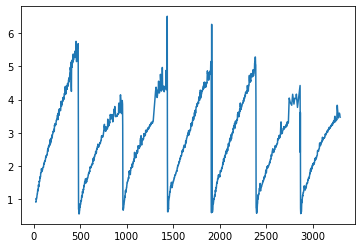

In [6]:
plt.plot(df_t['total_cpu_util'])

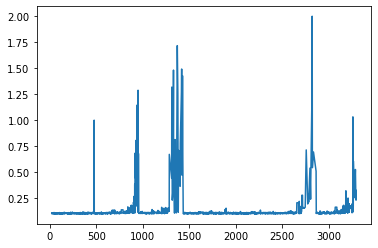

In [7]:
plt.plot(df_t['responsetime'])

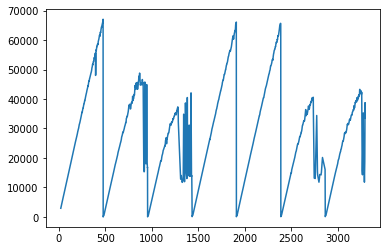

In [8]:
plt.plot(df_t['requests'])

In [9]:
X_train = df_t[[col for col in df_t.columns if col != 'requests']]
y_train = df_t['requests']
X_train = preprocessing.normalize(X_train, norm='max')
X_test = df_ttest[[col for col in df_ttest.columns if col != 'requests']]
y_test = df_ttest['requests']
X_test = preprocessing.normalize(X_test, norm='max')

In [10]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=7,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

# fitting the linear regression model to the dataset

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
get_cv_scores(lin_reg)

CV Mean:  0.7090656690383105
STD:  0.308297282250583




# fitting the polynomial regression model to the dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) # plot from 2 to 5 
X_poly=poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg2=LinearRegression()
lin_reg2.fit(X_poly,y_train)
get_cv_scores(lin_reg2)

CV Mean:  0.7090656690383105
STD:  0.308297282250583




[[1.99082658e-02 1.00000000e+00 1.74542163e-04 1.69251728e-03]
 [1.99082658e-02 1.00000000e+00 1.77201668e-04 1.69251728e-03]
 [1.38627277e-03 1.00000000e+00 1.77320721e-04 1.68116265e-03]
 ...
 [7.14160042e-03 1.00000000e+00 1.51254131e-04 6.76694337e-02]
 [7.14160042e-03 1.00000000e+00 1.36193087e-04 6.76694337e-02]
 [7.19203101e-03 1.00000000e+00 1.36682201e-04 6.76503078e-02]]


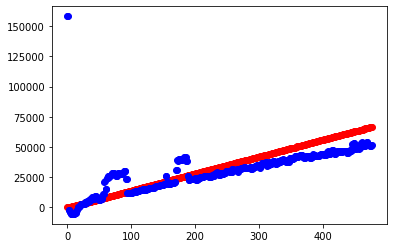

R² : 0.49976353789319117


In [13]:
#plt.scatter(X,y,color='red')
print(X_test)
y_perd= lin_reg.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
from sklearn.metrics import r2_score, f1_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

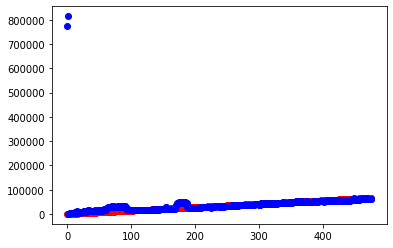

R² : -6.191275038145386


In [14]:
# plt.scatter(X,y,color='red')
y_perd= lin_reg2.predict(poly_reg.fit_transform(X_test))
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

# sklearn.neural_network.MLPRegressor

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 1, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


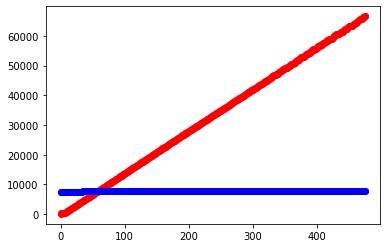

-1.7241393946364472
R² : -1.7241393946364472


In [15]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

#y_perd = regr.predict(X_eval)
#plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
#plt.scatter(range(0,len(y_test)),y_test,color='red')
#plt.show()
#print(regr.score(X_eval, y_eval))

print(regr.get_params(deep=True))

y_perd = regr.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)

/home/ubuntu/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 50, 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 1000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': 10, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


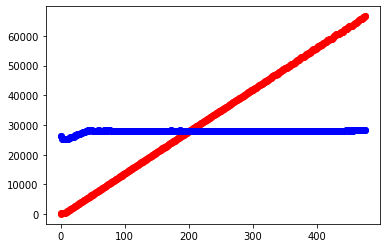

-0.04659909492178538
R² : -0.04659909492178538


In [16]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=10, max_iter=1000, batch_size=50).fit(X_train, y_train)

#y_perd = regr.predict(X_eval)
#plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
#plt.scatter(range(0,len(y_test)),y_test,color='red')
#plt.show()
#print(regr.score(X_eval, y_eval))

print(regr.get_params(deep=True))

y_perd = regr.predict(X_test)
plt.scatter(range(0,len(y_test)),y_test,color='red')
plt.scatter(range(0,len(y_perd)),y_perd,color='blue')
plt.show()
print(regr.score(X_test, y_test))
from sklearn.metrics import r2_score
R = r2_score(y_test, y_perd)
print ('R² :',R)